In [8]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None
df = pd.read_csv('exams.csv') #reading the csv file
df.head(5)

gender race/ethnicity parental level of education         lunch  \
0  female        group D                some college      standard   
1    male        group D          associate's degree      standard   
2  female        group D                some college  free/reduced   
3    male        group B                some college  free/reduced   
4  female        group D          associate's degree      standard   

  test preparation course  math score  reading score  writing score  
0               completed          59             70             78  
1                    none          96             93             87  
2                    none          57             76             77  
3                    none          70             70             63  
4                    none          83             85             86

In [9]:
df.describe() #finding descriptive stastics for the numerical dataframe

math score  reading score  writing score
count  1000.000000    1000.000000    1000.000000
mean     67.810000      70.382000      69.140000
std      15.250196      14.107413      15.025917
min      15.000000      25.000000      15.000000
25%      58.000000      61.000000      59.000000
50%      68.000000      70.500000      70.000000
75%      79.250000      80.000000      80.000000
max     100.000000     100.000000     100.000000

In [10]:
df.describe(include='O') #finding descriptive stastics for the non numerical dataframe 

gender race/ethnicity parental level of education     lunch  \
count    1000           1000                        1000      1000   
unique      2              5                           6         2   
top      male        group C                some college  standard   
freq      508            323                         224       660   

       test preparation course  
count                     1000  
unique                       2  
top                       none  
freq                       656

In [11]:
df.isna().sum() #finding missing values

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

C:\Users\Marawam\AppData\Local\Temp\ipykernel_23824\2667253884.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=feature, ax=axes[i], palette=palette_color)
C:\Users\Marawam\AppData\Local\Temp\ipykernel_23824\2667253884.py:30: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(data=df, y=feature, ax=axes[i], palette=palette_color)
C:\Users\Marawam\AppData\Local\Temp\ipykernel_23824\2667253884.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=feature, ax=axes[i], palette=palette_color)
C:\Users\Marawam\AppData\Local\Temp\ipykernel_23824\2667253884.py:30: UserWarning: The palette list has more values 

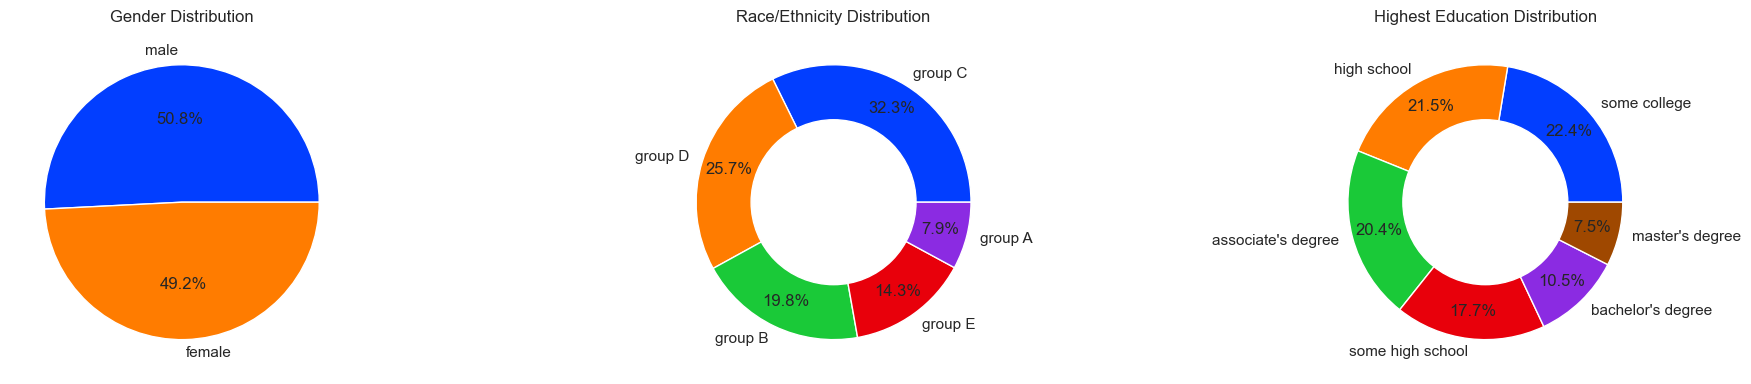

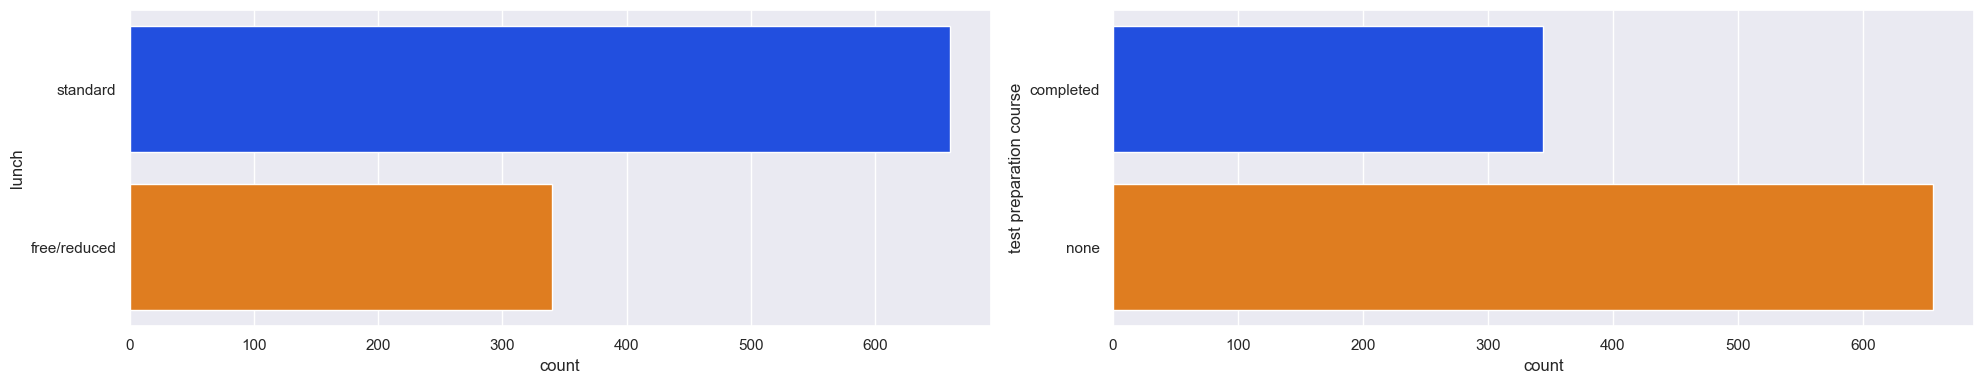

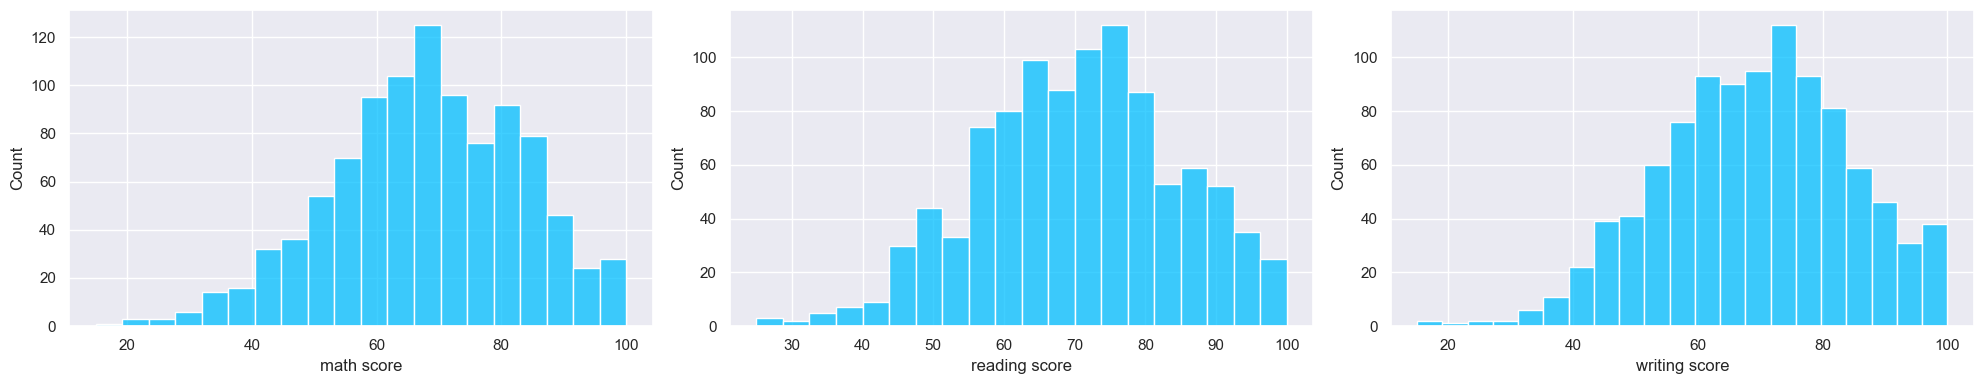

In [12]:
# Get the features
features = df.columns

# we create a figure with 1 row and 3 columns then We loop over these features and plot  
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 4))
palette_color = sns.color_palette('bright') 
sns.set_theme()

gender = df["gender"].value_counts()
axes[0].pie(gender, labels=gender.index, autopct='%.1f%%', colors=palette_color)
axes[0].set_title('Gender Distribution')

race = df["race/ethnicity"].value_counts()
axes[1].pie(race, labels=race.index, autopct='%.1f%%', colors=palette_color, pctdistance=0.80,)
centre_circle1 = plt.Circle((0,0),0.60,fc='white')
axes[1].add_artist(centre_circle1)
axes[1].set_title('Race/Ethnicity Distribution')

highest_education = df["parental level of education"].value_counts()
axes[2].pie(highest_education, labels=highest_education.index, autopct='%.1f%%',colors=palette_color, pctdistance=0.80,)
centre_circle2 = plt.Circle((0,0),0.60,fc='white')
axes[2].add_artist(centre_circle2)
axes[2].set_title('Highest Education Distribution')
plt.tight_layout()


# same as before and plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 4))
for i, feature in enumerate(features[3:5]):
    sns.countplot(data=df, y=feature, ax=axes[i], palette=palette_color)
plt.tight_layout()

# same as before and plot
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 4))
for i, feature in enumerate(features[5:]):
    sns.histplot(data=df, x=feature, ax=axes[i], color='deepskyblue')
plt.tight_layout()
plt.show()

C:\Users\Marawam\AppData\Local\Temp\ipykernel_23824\1415510834.py:8: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.boxplot(data=df, palette=palette_color, orient="h", ax=axes3)


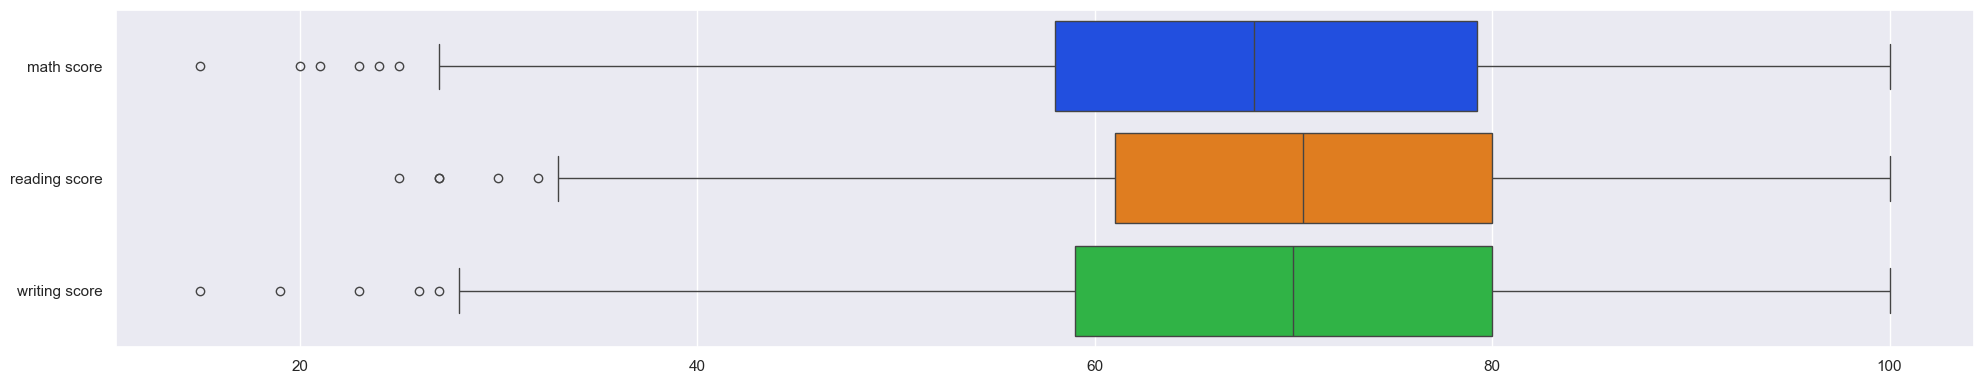

In [13]:
# Get the features
features = df.columns

# Create a figure
fig3, axes3 = plt.subplots(nrows=1, ncols=1, figsize=(20, 4))

# Start plotting boxplots from index 5
sns.boxplot(data=df, palette=palette_color, orient="h", ax=axes3)
plt.tight_layout()
plt.show()

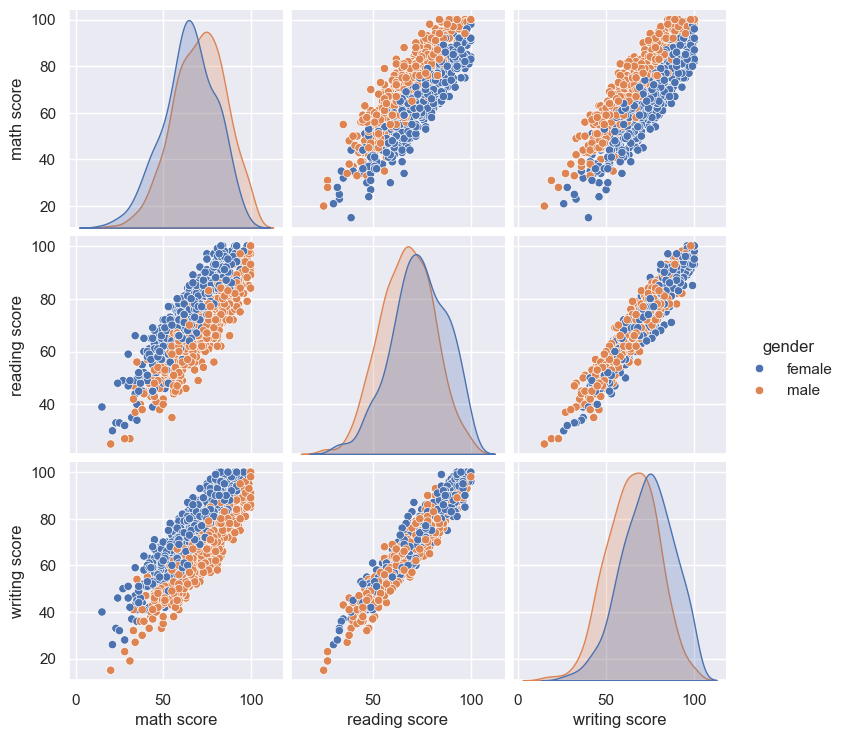

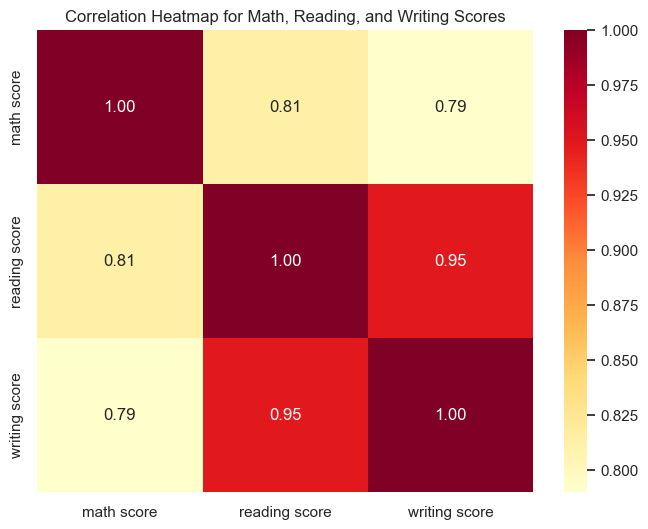

In [14]:
sns.pairplot(df, hue='gender')

# Selecting only the columns for math, reading, and writing scores
scores = df[['math score', 'reading score', 'writing score']]

# the correlation matrix measures the strength and direction of the linear relationship between two variables [-1 , 1].
correlation_matrix = scores.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrRd', fmt=".2f")
plt.title("Correlation Heatmap for Math, Reading, and Writing Scores")
plt.show()



In [15]:
# Encode categorial parameters Before splitting data
import category_encoders as ce
encoder = ce.OneHotEncoder(cols=['race/ethnicity'])
encoded_df = encoder.fit_transform(df)

# Binary encoding categorical variables
# we need encoding before doing regression to convert non numerical data to numerical one as of zeros and ones

encoded_df['gender']=encoded_df['gender'].replace({"male":0,"female":1}) #encode gender

encoded_df['lunch']=encoded_df['lunch'].replace({"standard":0,"free/reduced":1}) #encode lunch

encoded_df['test preparation course']=encoded_df['test preparation course'].replace({"none":0,"completed":1}) # Encode test preparation course

encoded_df['parental level of education']=encoded_df['parental level of education'].replace({'some high school':0,'high school':1,'some college':2,'associate\'s degree':3 ,'bachelor\'s degree':4,'master\'s degree':5})


C:\Users\Marawam\AppData\Local\Temp\ipykernel_23824\1619978278.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  encoded_df['gender']=encoded_df['gender'].replace({"male":0,"female":1}) #encode gender
C:\Users\Marawam\AppData\Local\Temp\ipykernel_23824\1619978278.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  encoded_df['lunch']=encoded_df['lunch'].replace({"standard":0,"free/reduced":1}) #encode lunch
C:\Users\Marawam\AppData\Local\Temp\ipykernel_23824\1619978278.py:13: FutureWarning: Downcasting behavior in `replace` is 

In [16]:
# Extract the target feature out of test and train data
extractor = encoded_df.copy()
y = extractor.pop('math score')  # Extract 'math score' it represents the target variable (dependent) (the variable we want to predict)
x = extractor



Best MSE: 26.381775170930524
Best model score 0.8947041710749289
********************
Average train MSE: 28.83215789443032
Average test MSE: 29.861136423770795



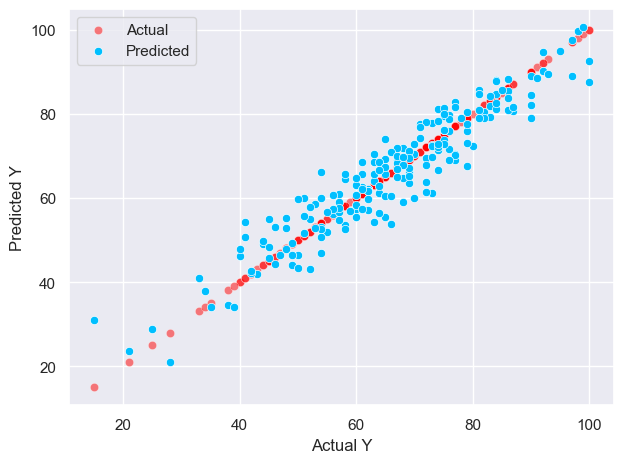

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

#Normal LinearRegression with k 5 fold cross validation

best_mse = 1000000000 #arbitrarly large MSE
best_model = 0
best_model_score = 0
best_model_actul_test = 0
best_model_test_predections = 0

kf = KFold(n_splits=5, random_state=None)

total_train_mse = 0
total_test_mse = 0

for j, (train_index, test_index) in enumerate(kf.split(x)):

    # Train Test split
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Normalization
    mean_X_train = np.mean(X_train[['reading score', 'writing score']], axis=0)
    std_X_train = np.std(X_train[['reading score', 'writing score']], axis=0)
    
    mean_X_test = np.mean(X_test[['reading score', 'writing score']], axis=0)
    std_X_test = np.std(X_test[['reading score', 'writing score']], axis=0)

    mean_y_train = np.mean(y_train)
    std_y_train = np.std(y_train)

    mean_y_test = np.mean(y_test, axis=0)
    std_y_test = np.std(y_test, axis=0)


    X_train_norm = X_train
    X_test_norm = X_test
    y_train_norm = y_train
    y_test_norm = y_test


    X_train_norm[['reading score', 'writing score']] = (X_train_norm[['reading score', 'writing score']] - mean_X_train) / std_X_train

    X_test_norm[['reading score', 'writing score']] = (X_test_norm[['reading score', 'writing score']] - mean_X_test) / std_X_test

    y_train_norm = (y_train_norm - mean_y_train) / std_y_train

    y_test_norm = (y_test_norm - mean_y_test) / std_y_test



    # Linear Regression
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train_norm, y_train_norm)

    # Train and test NSE
    y_train_predict_unnormalized = model.predict(X_train_norm)
    y_test_predict_unnormalized = model.predict(X_test_norm)

    y_train_predict_unnormalized = (y_train_predict_unnormalized * std_y_train) + mean_y_train
    y_test_predict_unnormalized = (y_test_predict_unnormalized * std_y_test) + mean_y_test

    train_mse = mean_squared_error(y_train, y_train_predict_unnormalized)
    test_mse = mean_squared_error(y_test, y_test_predict_unnormalized)
    model_score = model.score(X_test_norm,y_test_norm)

    total_train_mse += train_mse
    total_test_mse += test_mse

    
    if(test_mse < best_mse):
        best_mse = test_mse
        best_model_score = model_score
        best_model = model
        best_model_actul_test = y_test
        best_model_test_predections = y_test_predict_unnormalized
        
print()
print()
print('Best MSE:', best_mse)
print('Best model score', best_model_score)
print('********************')
print('Average train MSE:', total_train_mse / kf.get_n_splits())
print('Average test MSE:', total_test_mse / kf.get_n_splits())
print()

frame = pd.DataFrame({'Actual Y': best_model_actul_test, 'Predicted Y': best_model_test_predections})
sns.scatterplot(data=frame, x='Actual Y',y='Actual Y', color='red', legend='full', label='Actual', alpha=0.5)
sns.scatterplot(data=frame, x='Actual Y',y='Predicted Y', color='deepskyblue', label='Predicted')
plt.ylabel('Predicted Y')
plt.tight_layout()
plt.legend()
plt.show()

c:\Users\Marawam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=4.34105e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\Marawam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.58899e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\Marawam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=3.90444e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T




Best MSE: 26.271428181384216
Best model score 0.8951445916932681
Best model alpha: 0.1
********************
Lambda = 0: Average Train MSE = 28.83, Average Test MSE = 29.92

Lambda = 0.1: Average Train MSE = 28.82, Average Test MSE = 29.89

Lambda = 1: Average Train MSE = 28.82, Average Test MSE = 29.88

Lambda = 10: Average Train MSE = 29.08, Average Test MSE = 30.04

Lambda = 100: Average Train MSE = 36.57, Average Test MSE = 37.05



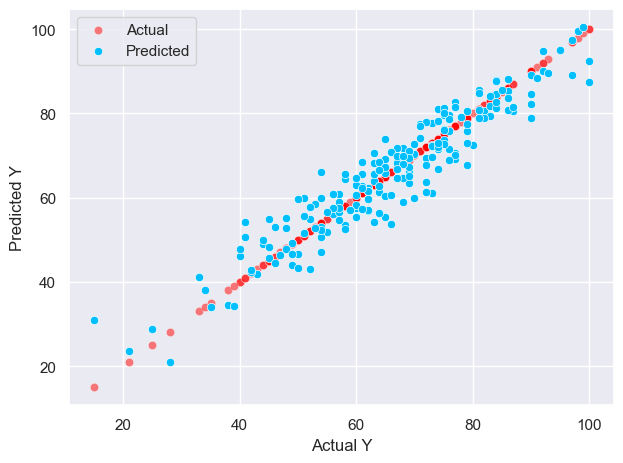

In [18]:
from sklearn.linear_model import Ridge

best_mse = 1000000000 #arbitrarly large MSE
best_model_score = 0
alpha_best_model = 0
best_model = 0
best_model_actul_test = 0
best_model_test_predections = 0


# Define regularization parameters
alphas = [0, 0.1, 1, 10, 100]
n_alphas = len(alphas)

# Initialize subplots
avg_test_mse = np.zeros(n_alphas)
avg_train_mse = np.zeros(n_alphas)

for i, alpha in enumerate(alphas):

    kf = KFold(n_splits=5, random_state=None)

    total_test_mse = 0
    total_train_mse = 0
    for j, (train_index, test_index) in enumerate(kf.split(x)):

        # Train Test split
        X_train, X_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Normalization
        mean_X_train = np.mean(X_train[['reading score', 'writing score']], axis=0)
        std_X_train = np.std(X_train[['reading score', 'writing score']], axis=0)
        
        mean_X_test = np.mean(X_test[['reading score', 'writing score']], axis=0)
        std_X_test = np.std(X_test[['reading score', 'writing score']], axis=0)

        mean_y_train = np.mean(y_train)
        std_y_train = np.std(y_train)

        mean_y_test = np.mean(y_test, axis=0)
        std_y_test = np.std(y_test, axis=0)


        X_train_norm = X_train
        X_test_norm = X_test
        y_train_norm = y_train
        y_test_norm = y_test


        X_train_norm[['reading score', 'writing score']] = (X_train_norm[['reading score', 'writing score']] - mean_X_train) / std_X_train

        X_test_norm[['reading score', 'writing score']] = (X_test_norm[['reading score', 'writing score']] - mean_X_test) / std_X_test

        y_train_norm = (y_train_norm - mean_y_train) / std_y_train

        y_test_norm = (y_test_norm - mean_y_test) / std_y_test

        # Ridge Regression
        model = Ridge(alpha=alpha)
        model.fit(X_train_norm, y_train_norm)

        # Train and test NSE
        y_train_predict_unnormalized = model.predict(X_train_norm)
        y_test_predict_unnormalized = model.predict(X_test_norm)

        y_train_predict_unnormalized = (y_train_predict_unnormalized * std_y_train) + mean_y_train
        y_test_predict_unnormalized = (y_test_predict_unnormalized * std_y_test) + mean_y_test

        train_mse = mean_squared_error(y_train, y_train_predict_unnormalized)
        test_mse = mean_squared_error(y_test, y_test_predict_unnormalized)
        model_score = model.score(X_test_norm,y_test_norm)

        total_train_mse += train_mse
        total_test_mse += test_mse
        
        if(test_mse < best_mse):
            best_mse = test_mse
            best_model_score = model_score
            alpha_best_model = alpha
            best_model = model
            best_model_actul_test = y_test
            best_model_test_predections = y_test_predict_unnormalized
            
    # Compute average train and test MSE for the current lambda
    avg_train_mse[i] = total_train_mse / kf.get_n_splits()
    avg_test_mse[i] = total_test_mse / kf.get_n_splits()

print()
print()
print('Best MSE:', best_mse)
print('Best model score', best_model_score)
print('Best model alpha:', alpha_best_model)
print('********************')
for i, alpha in enumerate(alphas):
    print(f"Lambda = {alpha}: Average Train MSE = {avg_train_mse[i]:.2f}, Average Test MSE = {avg_test_mse[i]:.2f}")
    print()

frame = pd.DataFrame({'Actual Y': best_model_actul_test, 'Predicted Y': best_model_test_predections})
sns.scatterplot(data=frame, x='Actual Y',y='Actual Y', color='red', legend='full', label='Actual', alpha=0.5)
sns.scatterplot(data=frame, x='Actual Y',y='Predicted Y', color='deepskyblue', label='Predicted')
plt.ylabel('Predicted Y')
plt.tight_layout()
plt.legend()
plt.show()
    

c:\Users\Marawam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:243: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
c:\Users\Marawam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:243: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
c:\Users\Marawam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:243: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
c:\Users\Marawam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:243: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
c:\Users\Marawam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:243: UserWarni



********************
Best MSE: 26.271428181384213
Best model score 0.8951445916932681
Best model alpha: 0.1
Best model degree: 1
********************




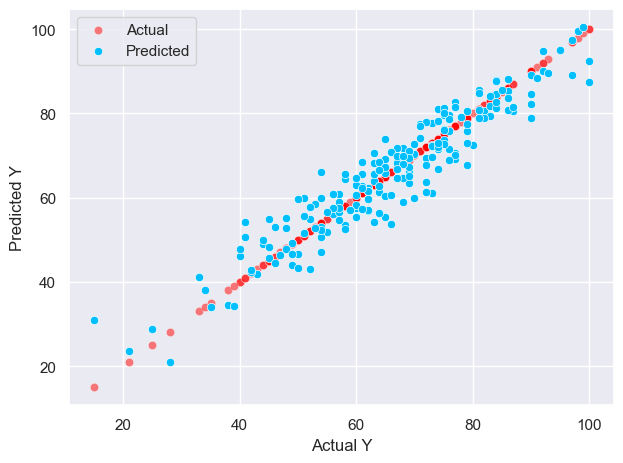

In [19]:
from sklearn.preprocessing import PolynomialFeatures


best_mse = 1000000000 #arbitrarly large MSE
best_model_score = 0
alpha_best_model = 0
best_model_degree = 0
best_model = 0
best_model_actul_test = 0
best_model_test_predections = 0


# Define regularization parameters
alphas = [0, 0.1, 1, 10, 100]
n_alphas = len(alphas)

# Degrees to try
degrees = [0, 1, 2, 4, 8]

for i, degree in enumerate(degrees):
    
    for i, alpha in enumerate(alphas):

        kf = KFold(n_splits=5, random_state=None)

        total_test_mse = 0
        total_train_mse = 0
        for j, (train_index, test_index) in enumerate(kf.split(x)):

            # Train Test split
            X_train, X_test = x.iloc[train_index], x.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            # Normalization
            mean_X_train = np.mean(X_train[['reading score', 'writing score']], axis=0)
            std_X_train = np.std(X_train[['reading score', 'writing score']], axis=0)
            
            mean_X_test = np.mean(X_test[['reading score', 'writing score']], axis=0)
            std_X_test = np.std(X_test[['reading score', 'writing score']], axis=0)

            mean_y_train = np.mean(y_train)
            std_y_train = np.std(y_train)

            mean_y_test = np.mean(y_test, axis=0)
            std_y_test = np.std(y_test, axis=0)


            X_train_norm = X_train
            X_test_norm = X_test
            y_train_norm = y_train
            y_test_norm = y_test


            X_train_norm[['reading score', 'writing score']] = (X_train_norm[['reading score', 'writing score']] - mean_X_train) / std_X_train

            X_test_norm[['reading score', 'writing score']] = (X_test_norm[['reading score', 'writing score']] - mean_X_test) / std_X_test

            y_train_norm = (y_train_norm - mean_y_train) / std_y_train

            y_test_norm = (y_test_norm - mean_y_test) / std_y_test

            #polynomial features
            poly_features = PolynomialFeatures(degree=degree, include_bias=True)
            x_train_norm_poly = poly_features.fit_transform(X_train_norm)
            x_test_norm_poly = poly_features.fit_transform(X_test_norm)

            # non-linear Regression
            model = Ridge(alpha=alpha)
            model.fit(x_train_norm_poly, y_train_norm)

            # Train and test NSE
            y_train_predict_unnormalized = model.predict(x_train_norm_poly)
            y_test_predict_unnormalized = model.predict(x_test_norm_poly)

            y_train_predict_unnormalized = (y_train_predict_unnormalized * std_y_train) + mean_y_train
            y_test_predict_unnormalized = (y_test_predict_unnormalized * std_y_test) + mean_y_test

            train_mse = mean_squared_error(y_train, y_train_predict_unnormalized)
            test_mse = mean_squared_error(y_test, y_test_predict_unnormalized)
            model_score = model.score(x_test_norm_poly,y_test_norm)

            total_train_mse += train_mse
            total_test_mse += test_mse
            
            if(test_mse < best_mse):
                best_mse = test_mse
                best_model_score = model_score
                alpha_best_model = alpha
                best_model_degree = degree
                best_model = model
                best_model_actul_test = y_test
                best_model_test_predections = y_test_predict_unnormalized
            

print()
print()
print('********************')
print('Best MSE:', best_mse)
print('Best model score', best_model_score)
print('Best model alpha:', alpha_best_model)
print('Best model degree:', best_model_degree)
print('********************')
print()
print()

frame = pd.DataFrame({'Actual Y': best_model_actul_test, 'Predicted Y': best_model_test_predections})
sns.scatterplot(data=frame, x='Actual Y',y='Actual Y', color='red', legend='full', label='Actual', alpha=0.5)
sns.scatterplot(data=frame, x='Actual Y',y='Predicted Y', color='deepskyblue', label='Predicted')
plt.ylabel('Predicted Y')
plt.tight_layout()
plt.legend()
plt.show()

### Trying finding the best model after removing outliers and see if it's better

In [20]:
# No Outliers
no_outliers = encoded_df.copy()

# Remove outliers from train data
no_outliers=no_outliers[no_outliers['reading score']>=30]
no_outliers=no_outliers[no_outliers['writing score']>=20]
no_outliers=no_outliers[no_outliers['math score']>=19]
print(len(no_outliers))

# Extract the target feature out of test and train data
extractor = no_outliers.copy()
y = extractor.pop('math score')  # Extract 'math score' it represents the target variable (dependent) (the variable we want to predict)
x = extractor

996


c:\Users\Marawam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:243: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
c:\Users\Marawam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:243: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
c:\Users\Marawam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:243: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
c:\Users\Marawam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:243: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
c:\Users\Marawam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:243: UserWarni



********************
Best MSE: 25.337585967279423
Best model score 0.8943711780487082
Best model alpha: 0.1
Best model degree: 1
********************




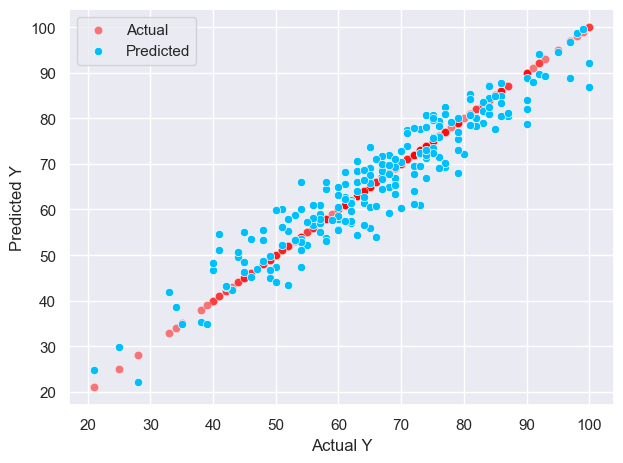

In [21]:
from sklearn.preprocessing import PolynomialFeatures


best_mse = 1000000000 #arbitrarly large MSE
best_model_score = 0
alpha_best_model = 0
best_model_degree = 0
best_model = 0
best_model_actul_test = 0
best_model_test_predections = 0


# Define regularization parameters
alphas = [0, 0.1, 1, 10, 100]
n_alphas = len(alphas)

# Degrees to try
degrees = [0, 1, 2, 4, 8]

for i, degree in enumerate(degrees):
    
    for m, alpha in enumerate(alphas):

        kf = KFold(n_splits=5, random_state=None)

        total_test_mse = 0
        total_train_mse = 0
        for j, (train_index, test_index) in enumerate(kf.split(x)):

            # Train Test split
            X_train, X_test = x.iloc[train_index], x.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            # Normalization
            mean_X_train = np.mean(X_train[['reading score', 'writing score']], axis=0)
            std_X_train = np.std(X_train[['reading score', 'writing score']], axis=0)
            
            mean_X_test = np.mean(X_test[['reading score', 'writing score']], axis=0)
            std_X_test = np.std(X_test[['reading score', 'writing score']], axis=0)

            mean_y_train = np.mean(y_train)
            std_y_train = np.std(y_train)

            mean_y_test = np.mean(y_test, axis=0)
            std_y_test = np.std(y_test, axis=0)


            X_train_norm = X_train
            X_test_norm = X_test
            y_train_norm = y_train
            y_test_norm = y_test


            X_train_norm[['reading score', 'writing score']] = (X_train_norm[['reading score', 'writing score']] - mean_X_train) / std_X_train

            X_test_norm[['reading score', 'writing score']] = (X_test_norm[['reading score', 'writing score']] - mean_X_test) / std_X_test

            y_train_norm = (y_train_norm - mean_y_train) / std_y_train

            y_test_norm = (y_test_norm - mean_y_test) / std_y_test

            #polynomial features
            poly_features = PolynomialFeatures(degree=degree, include_bias=True)
            x_train_norm_poly = poly_features.fit_transform(X_train_norm)
            x_test_norm_poly = poly_features.fit_transform(X_test_norm)

            # non-linear Regression
            model = Ridge(alpha=alpha)
            model.fit(x_train_norm_poly, y_train_norm)

            # Train and test NSE
            y_train_predict_unnormalized = model.predict(x_train_norm_poly)
            y_test_predict_unnormalized = model.predict(x_test_norm_poly)

            y_train_predict_unnormalized = (y_train_predict_unnormalized * std_y_train) + mean_y_train
            y_test_predict_unnormalized = (y_test_predict_unnormalized * std_y_test) + mean_y_test

            train_mse = mean_squared_error(y_train, y_train_predict_unnormalized)
            test_mse = mean_squared_error(y_test, y_test_predict_unnormalized)
            model_score = model.score(x_test_norm_poly,y_test_norm)

            total_train_mse += train_mse
            total_test_mse += test_mse
            
            if(test_mse < best_mse):
                best_mse = test_mse
                best_model_score = model_score
                alpha_best_model = alpha
                best_model_degree = degree
                best_model = model  
                best_model_actul_test = y_test
                best_model_test_predections = y_test_predict_unnormalized  

print()
print()
print('********************')
print('Best MSE:', best_mse)
print('Best model score', best_model_score)
print('Best model alpha:', alpha_best_model)
print('Best model degree:', best_model_degree)
print('********************')
print()
print()

frame = pd.DataFrame({'Actual Y': best_model_actul_test, 'Predicted Y': best_model_test_predections})
sns.scatterplot(data=frame, x='Actual Y',y='Actual Y', color='red', legend='full', label='Actual', alpha=0.5)
sns.scatterplot(data=frame, x='Actual Y',y='Predicted Y', color='deepskyblue', label='Predicted')
plt.ylabel('Predicted Y')
plt.tight_layout()
plt.legend()
plt.show()


In [22]:
# Extract the target feature out of test and train data
extractor = encoded_df.copy()
y = extractor.pop('gender')  # Extract 'math score' it represents the target variable (dependent) (the variable we want to predict)
x = extractor
# Split Data


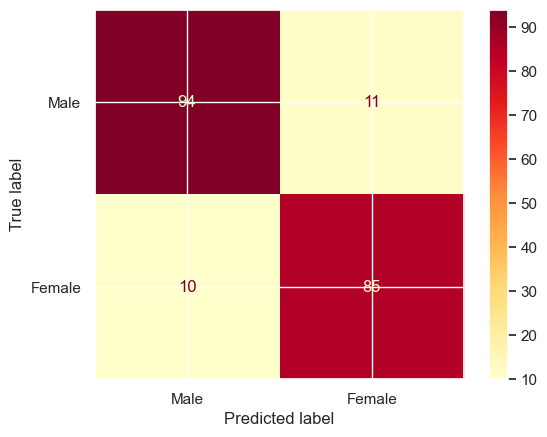

Best F-score: 0.8900523560209423
Best K-nighbours: 116
Precision: 0.8854166666666666
Recall: 0.8947368421052632
Accuracy: 0.895


In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Classfication with different k values and 5 KFolds

best_f_score = 0 
best_model = 0
best_k_nighbours = 0
best_model_precision = 0
best_model_recall = 0
best_model_accuracy = 0
best_model_confusion_matrix_display = 0

kf = KFold(n_splits=5, random_state=None)

for i in range(1, 300):

    for j, (train_index, test_index) in enumerate(kf.split(x)):

        # Train Test split
        X_train, X_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Normalization
        mean_X_train = np.mean(X_train[['reading score', 'writing score', 'math score']], axis=0)
        std_X_train = np.std(X_train[['reading score', 'writing score', 'math score']], axis=0)
        
        mean_X_test = np.mean(X_test[['reading score', 'writing score', 'math score']], axis=0)
        std_X_test = np.std(X_test[['reading score', 'writing score', 'math score']], axis=0)


        X_train_norm = X_train
        X_test_norm = X_test


        X_train_norm[['reading score', 'writing score', 'math score']] = (X_train_norm[['reading score', 'writing score', 'math score']] - mean_X_train) / std_X_train

        X_test_norm[['reading score', 'writing score', 'math score']] = (X_test_norm[['reading score', 'writing score', 'math score']] - mean_X_test) / std_X_test



        # Linear Regression
        model = KNeighborsClassifier(n_neighbors= i)
        model.fit(X_train_norm,y_train)

        # Test metrices
        y_test_predict = model.predict(X_test_norm)

        cm = confusion_matrix(y_test, y_test_predict)

        tn, fp, fn, tp = cm.ravel()

        # Calculate precision and recall
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)

        # Calculate accuracy
        accuracy = (tp + tn) / (tp + tn + fp + fn)

        # Calculate F-scroe
        f_score = (2 * precision * recall) / (precision + recall)

        

        
        if(f_score > best_f_score):
            best_f_score = f_score
            best_model = model
            best_k_nighbours = i
            best_model_precision = precision
            best_model_recall = recall
            best_model_accuracy = accuracy
            best_model_confusion_matrix_display = cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Male", "Female"],)


best_model_confusion_matrix_display.plot(cmap="YlOrRd")
plt.show()

# Print the results
print("Best F-score:", best_f_score)
print("Best K-nighbours:", best_k_nighbours)
print("Precision:", best_model_precision)
print("Recall:", best_model_recall)
print("Accuracy:", best_model_accuracy)
